In [1]:
#The objective is to predict based on diagnostic measurements whether a patient has diabetes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import shap
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv(r'C:\Users\KHUSHI KOTHARI\OneDrive\Desktop\pp\python\Diabetes patient prediction\Data-Science-Projects-main-Diabetes\Data-Science-Projects-main\Diabetes Patients Prediction Project\diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


DATA PRE-PROCESSING

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset.

In [9]:
df.shape

(768, 9)

In [10]:
#Data types of all the columns
df.dtypes 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

EXPLORATORY DATA ANALYSIS (EDA)

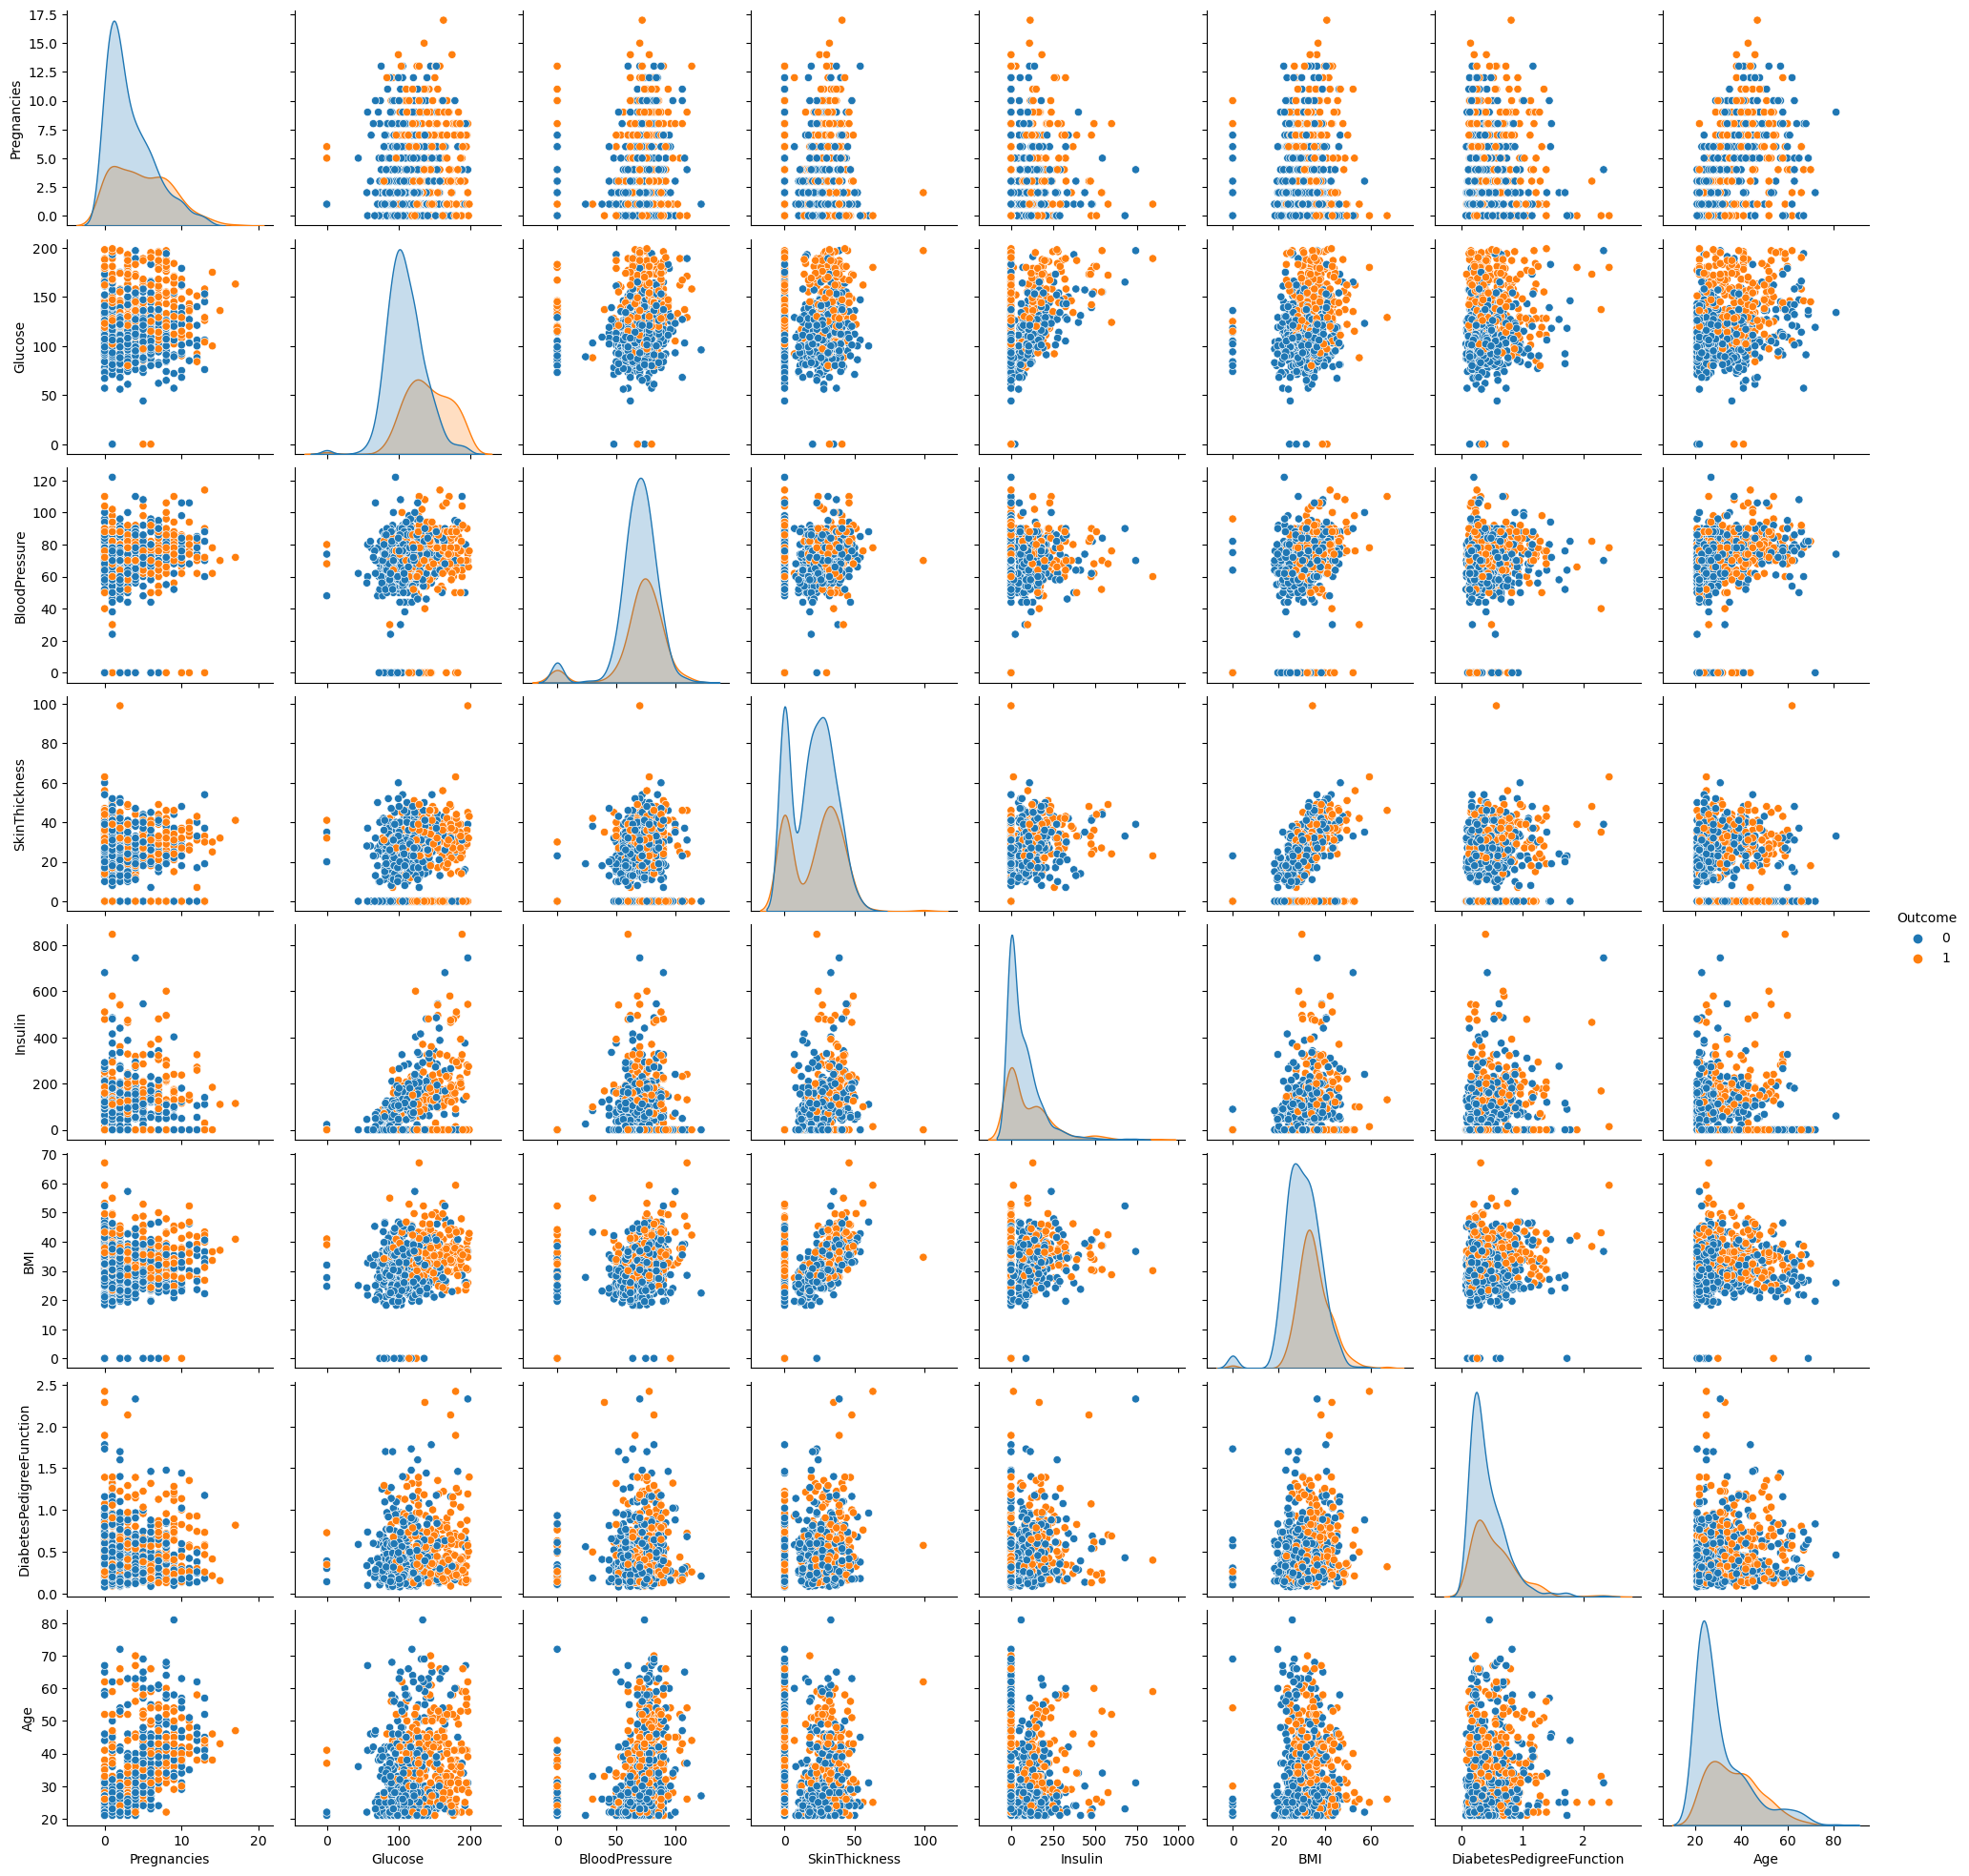

In [11]:
sns.pairplot(data = df, hue = 'Outcome')

In [12]:
#The graph plots pairwise relationship in the dataset

UNIVARIATE DATA ANALYSIS

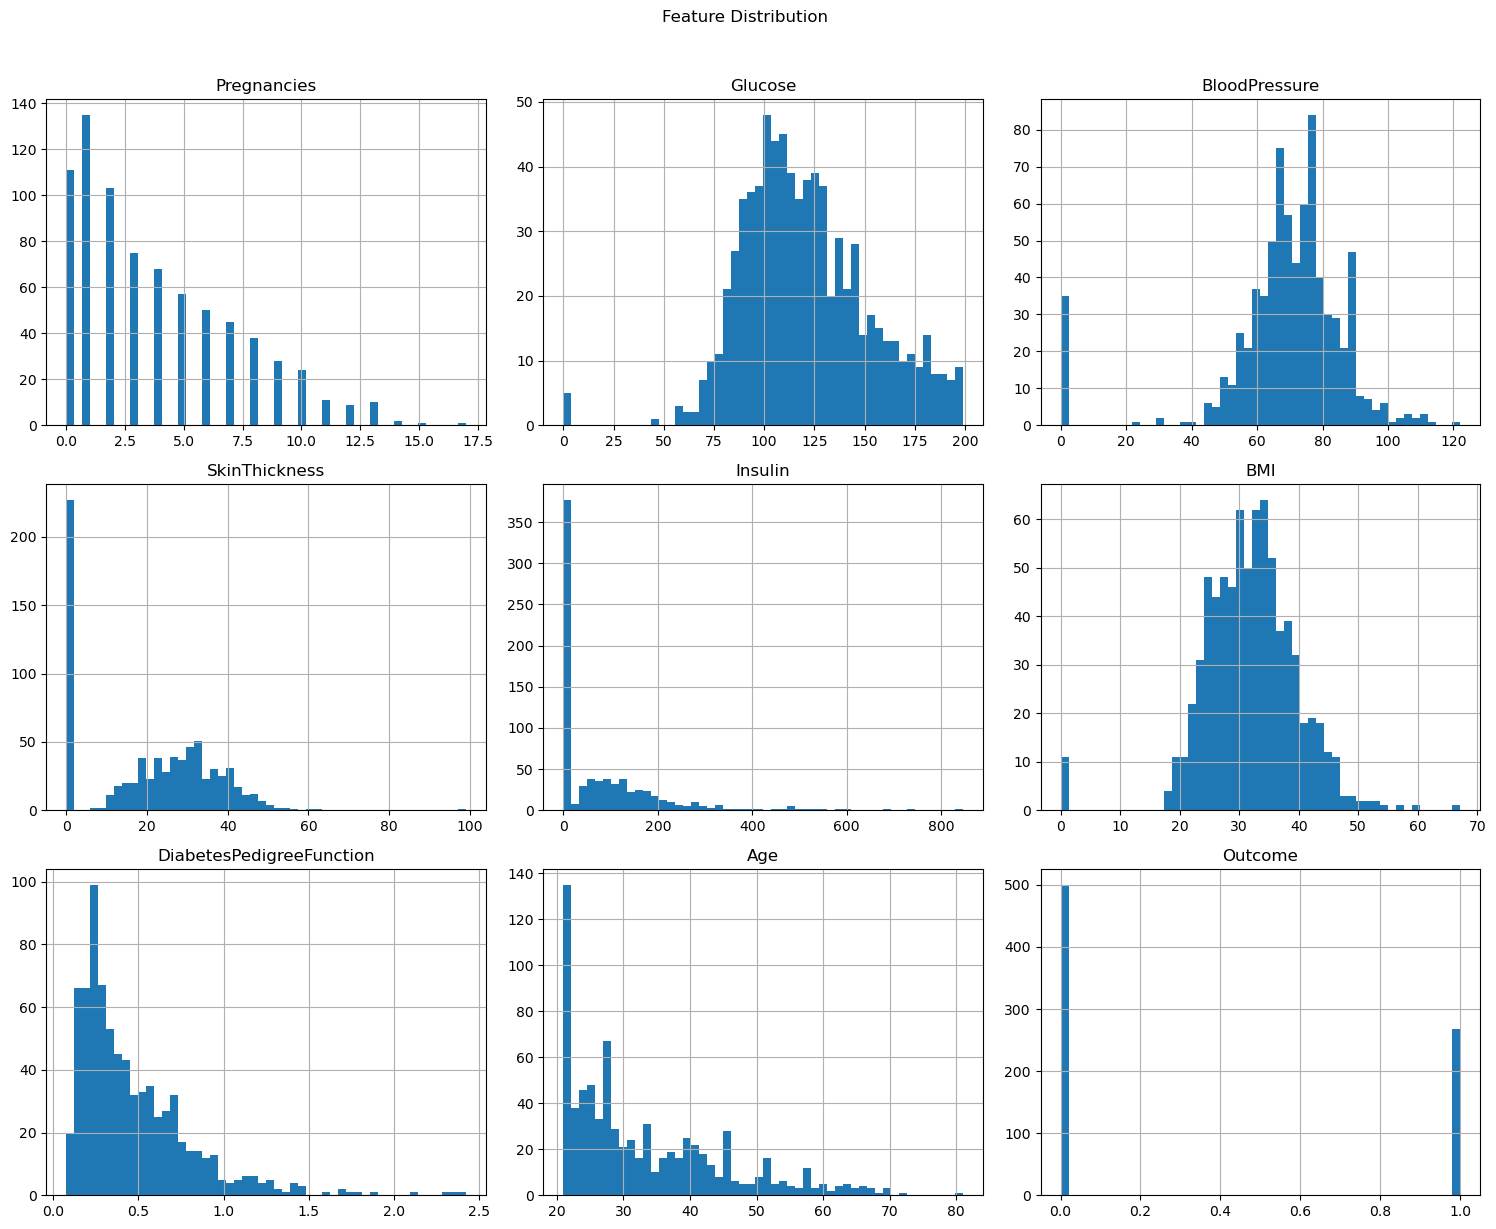

In [13]:
df.hist(bins = 50, figsize = (15,12))
plt.suptitle('Feature Distribution', x = 0.5, y = 1.02, ha = 'center', fontsize = 'large')
plt.tight_layout()

In [14]:
#The above graph plots all features present in the dataset

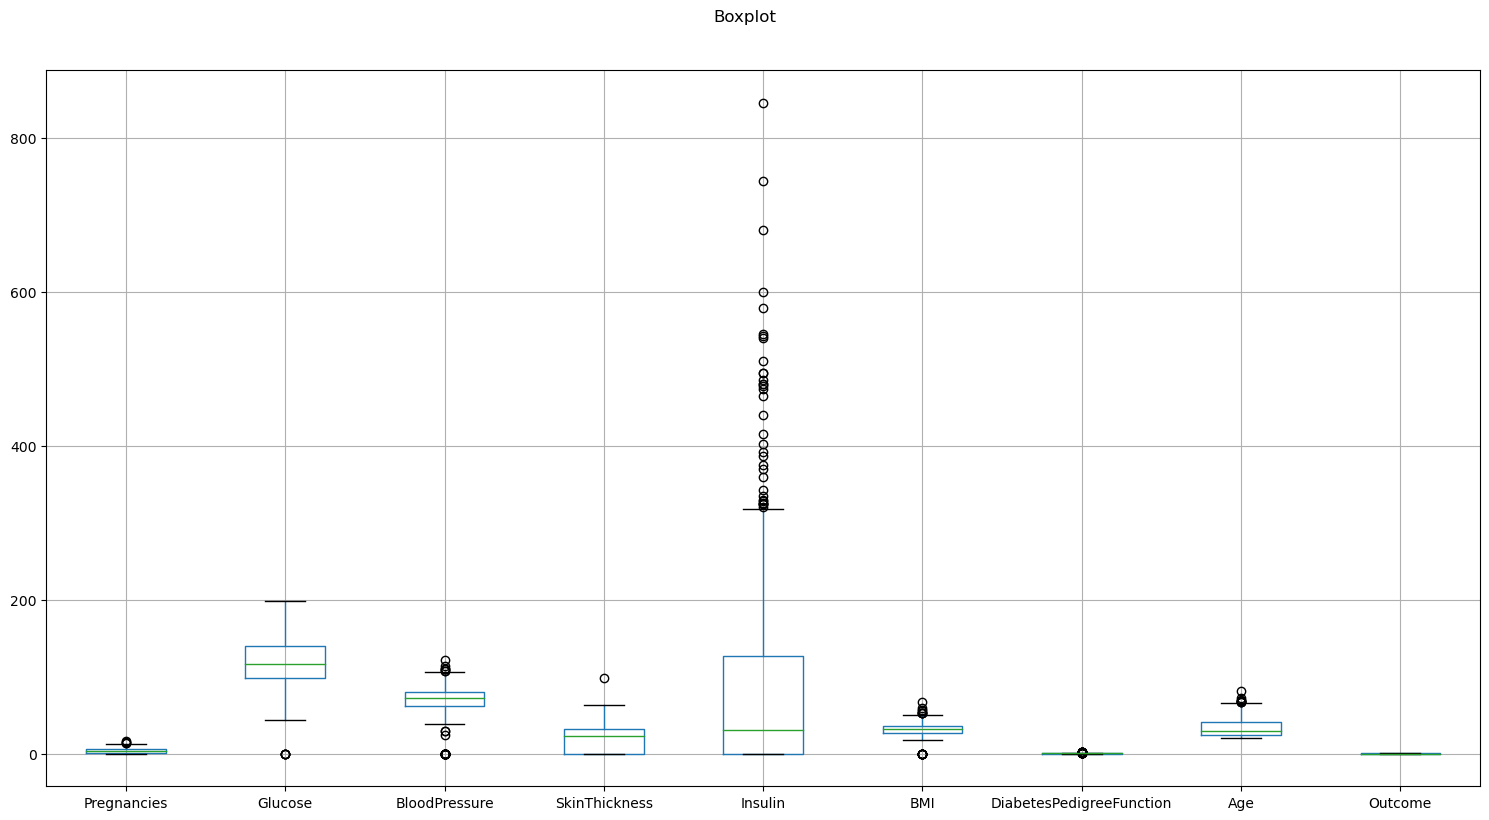

In [15]:
df.boxplot(figsize = (15,8))
plt.suptitle('Boxplot', x = 0.5, y = 1.02, ha = 'center', fontsize ='large')
plt.tight_layout()

In [16]:
#The graph of boxplot depicts the prescence of outliers in the dataset.

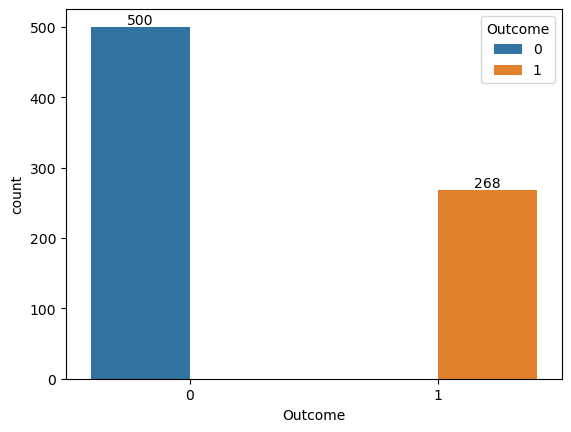

In [17]:
ax = sns.countplot(data = df, x= 'Outcome', hue ='Outcome')

for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
#The above graph shows the count of values of the two outcomes, ie, 268 candidates have tested positive for diabetes while 500 have not.

BIVARIATE DATA ANALYSIS

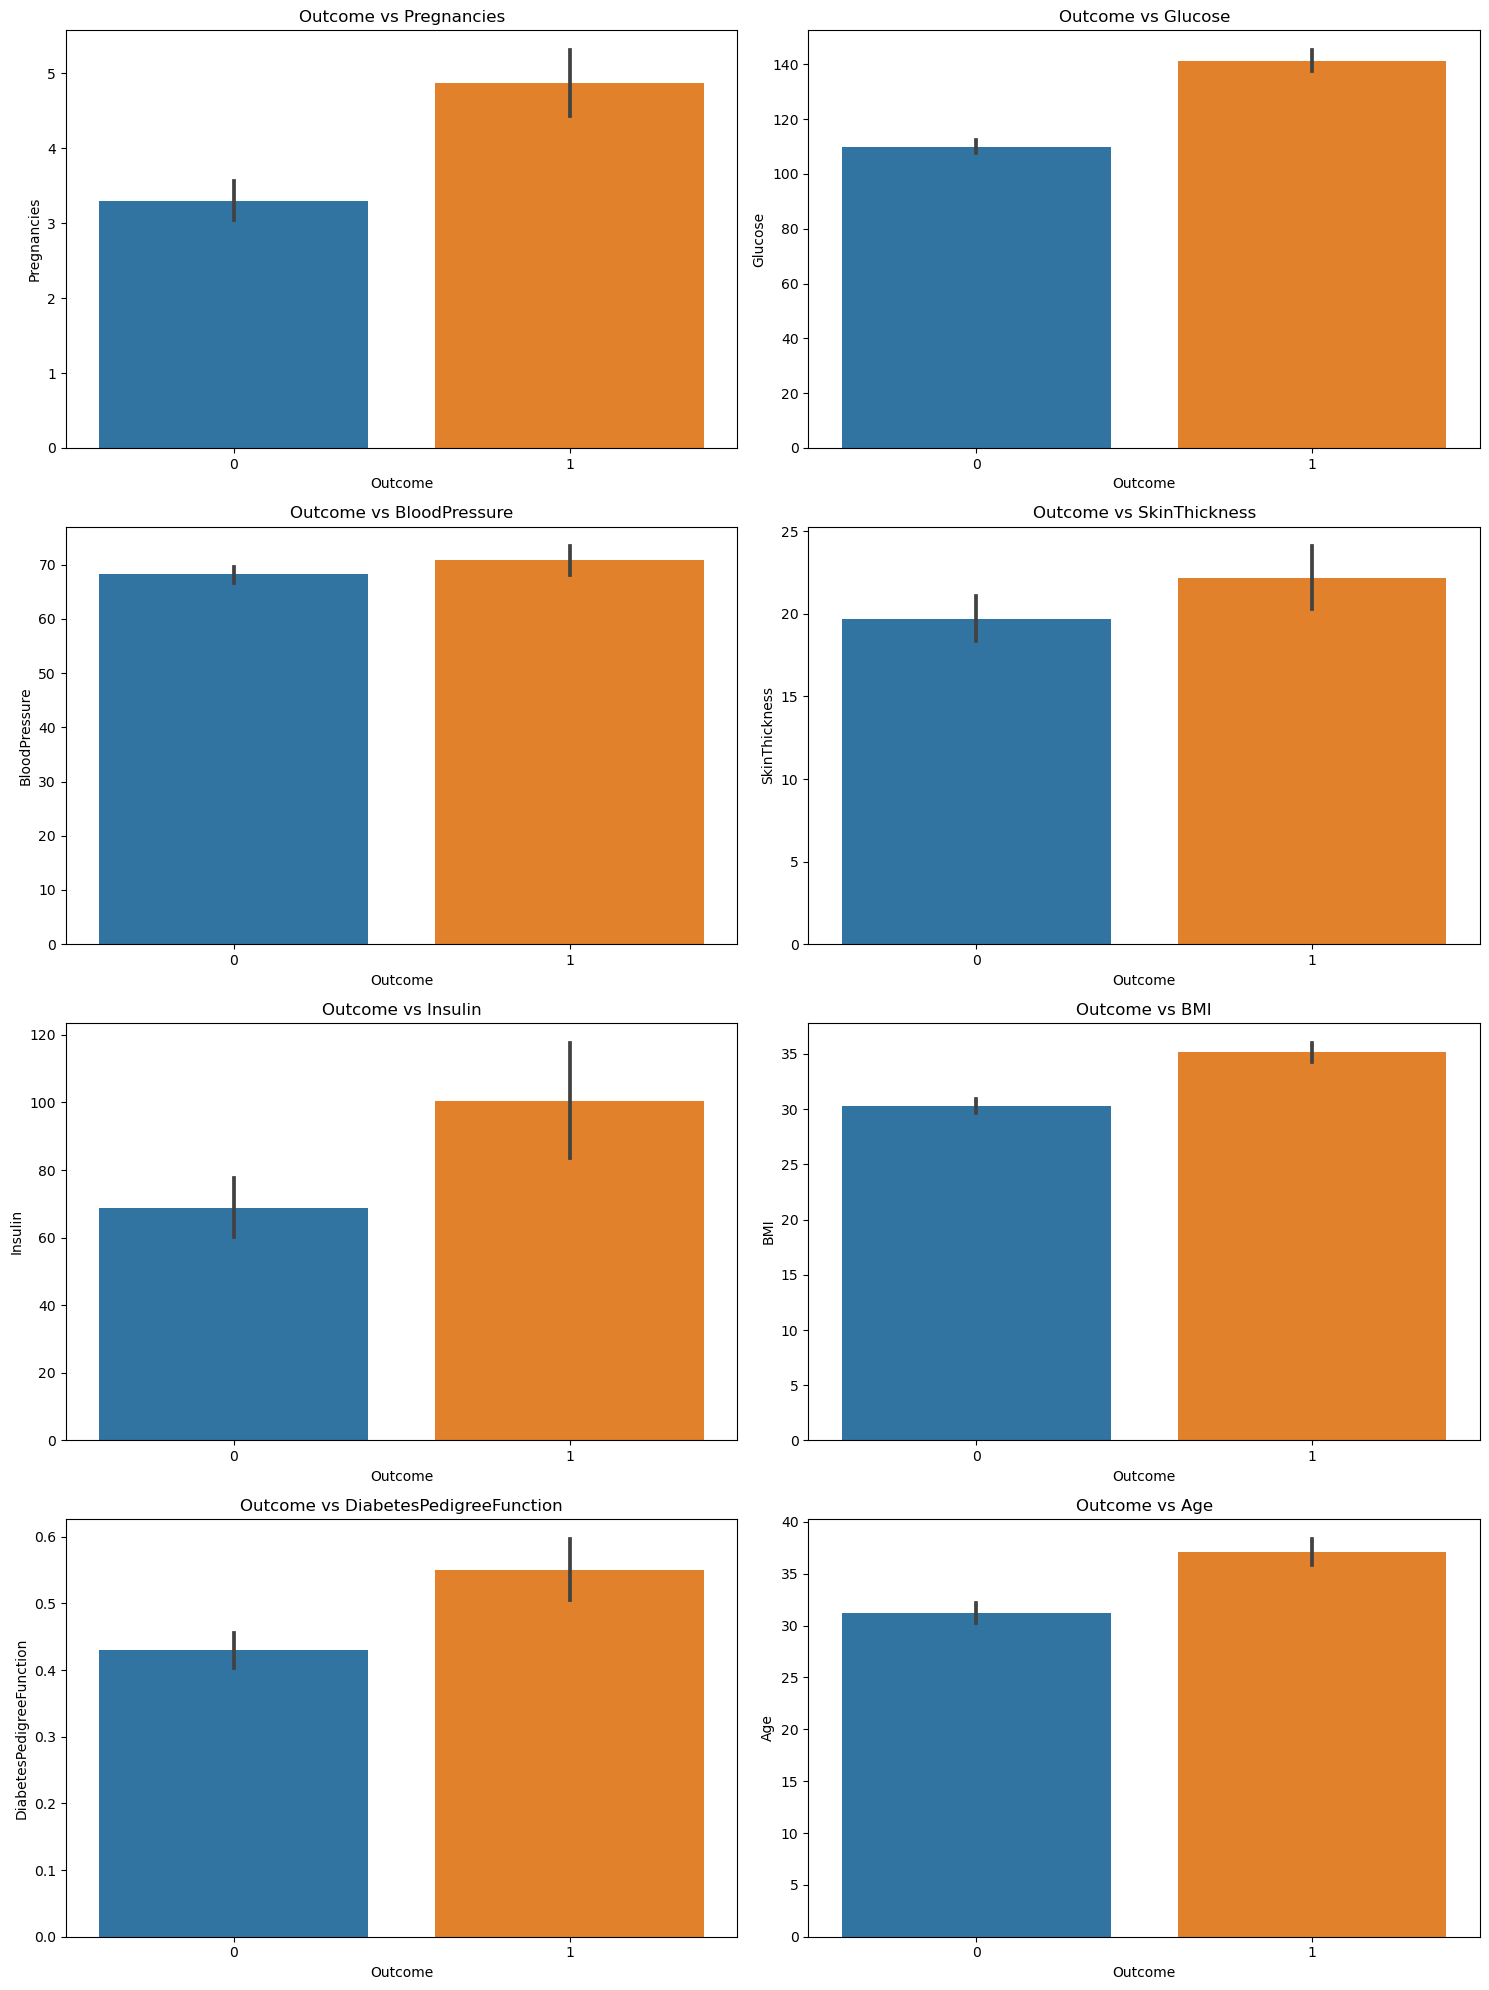

In [19]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.barplot(data = df, x = 'Outcome', y = 'Pregnancies')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.barplot(data = df, x = 'Outcome', y = 'Glucose')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.barplot(data = df, x = 'Outcome', y = 'BloodPressure')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.barplot(data = df, x = 'Outcome', y = 'SkinThickness')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.barplot(data = df, x = 'Outcome', y = 'Insulin')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.barplot(data = df, x = 'Outcome', y = 'BMI')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.barplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.barplot(data = df, x = 'Outcome', y = 'Age')
plt.title('Outcome vs Age')

plt.tight_layout()

In [20]:
#The graph shows the barplots of each feature wrt the outcome feature.

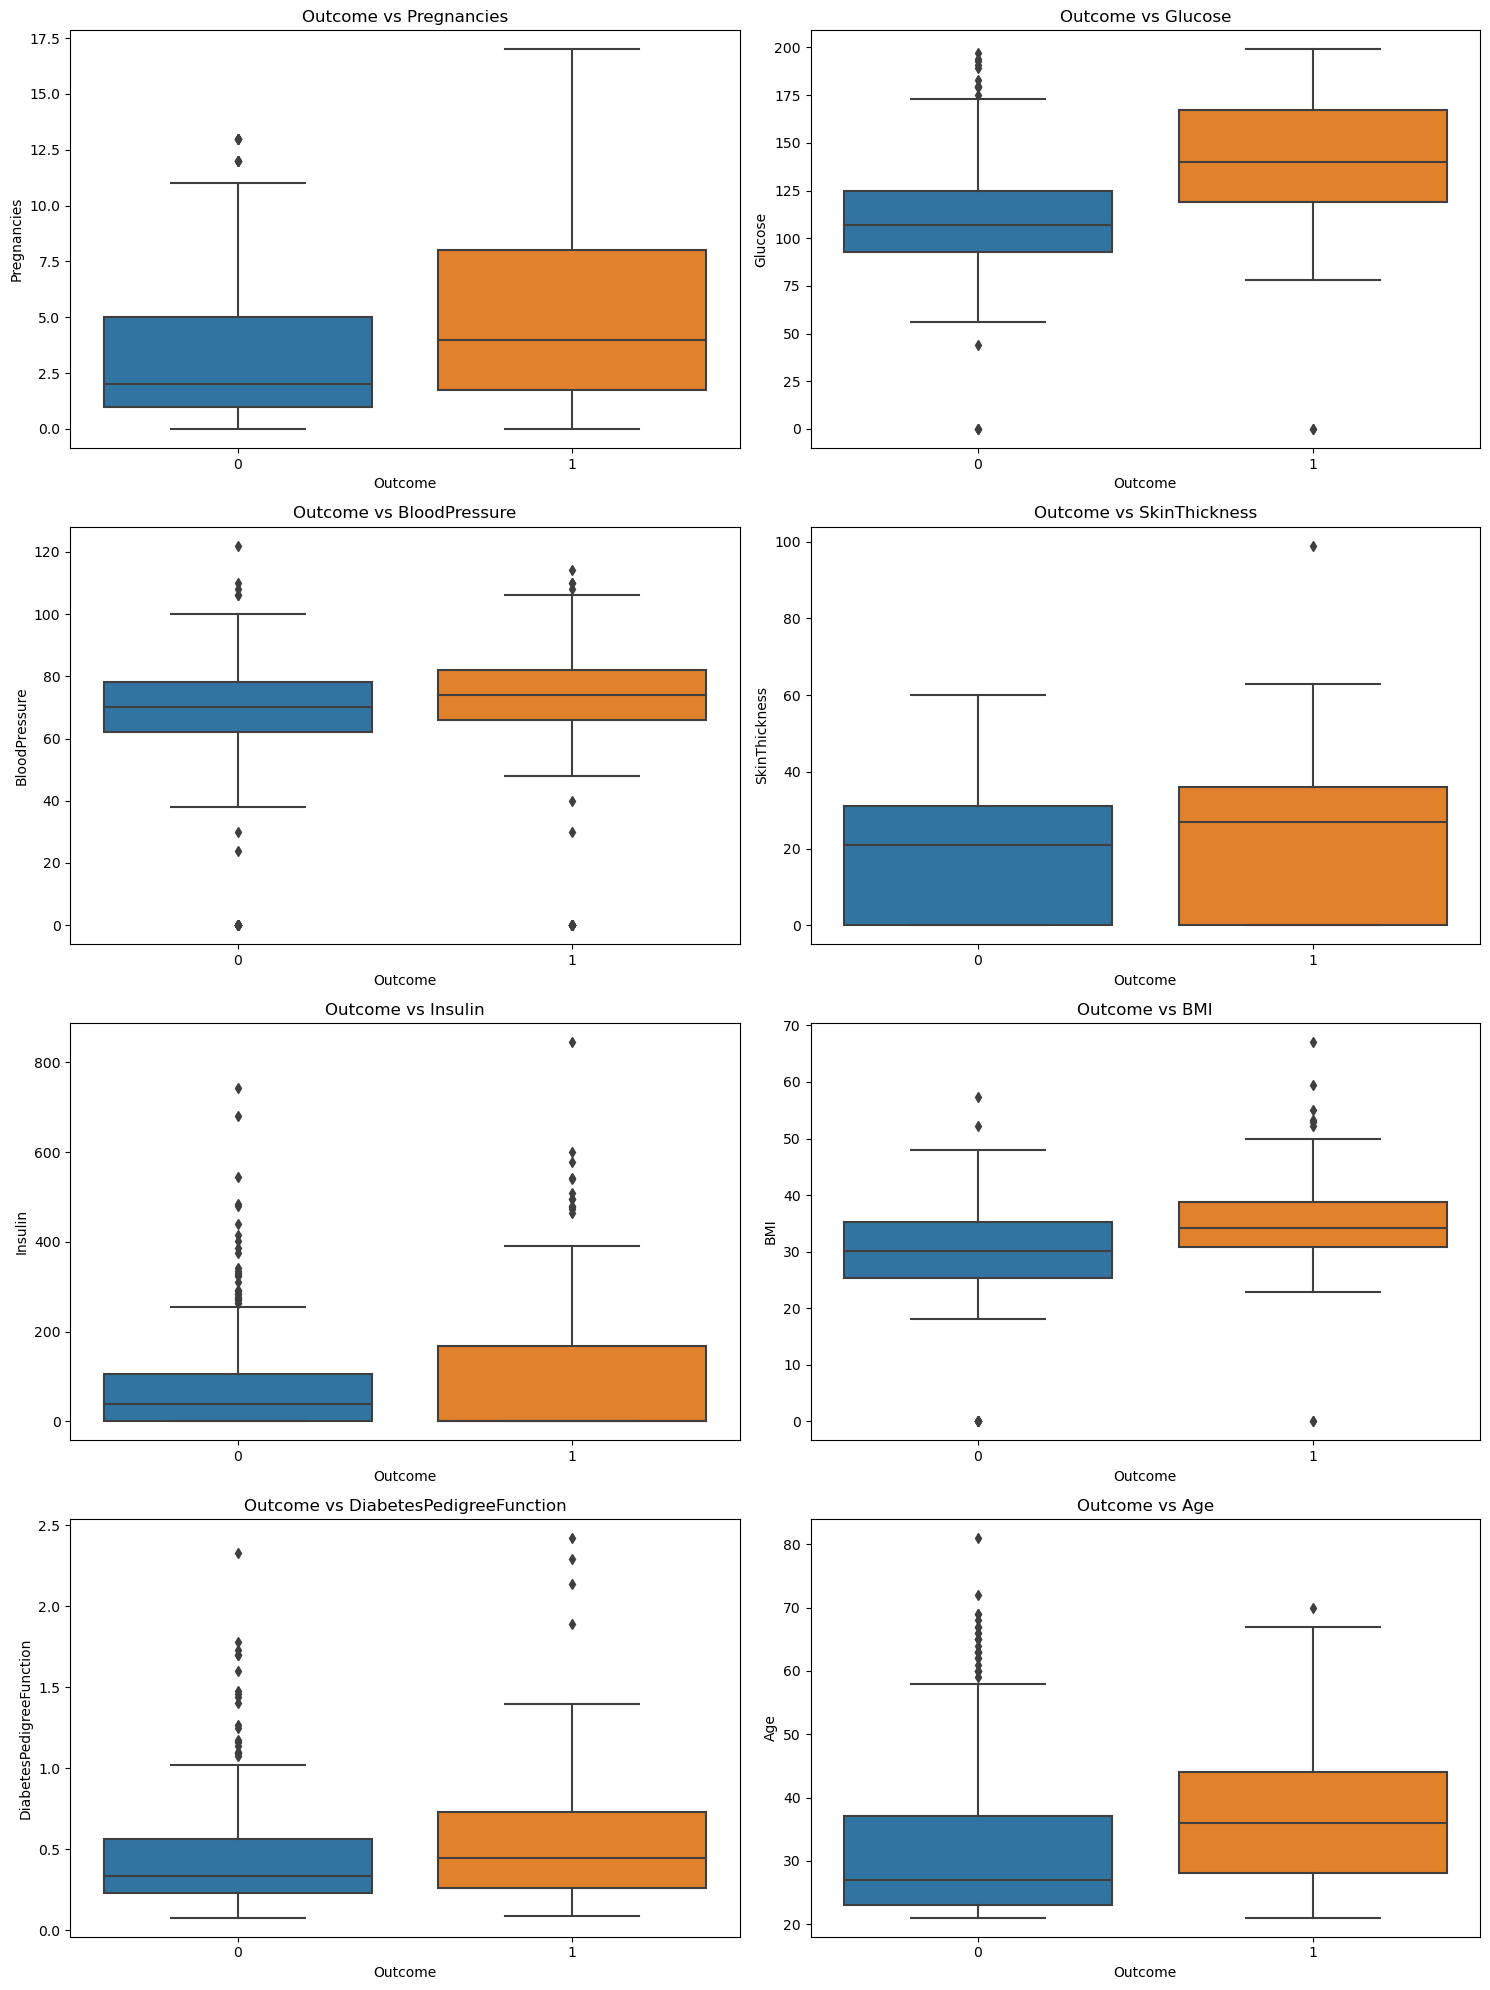

In [21]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.boxplot(data = df, x = 'Outcome', y = 'Pregnancies')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.boxplot(data = df, x = 'Outcome', y = 'Glucose')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.boxplot(data = df, x = 'Outcome', y = 'BloodPressure')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.boxplot(data = df, x = 'Outcome', y = 'SkinThickness')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.boxplot(data = df, x = 'Outcome', y = 'Insulin')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.boxplot(data = df, x = 'Outcome', y = 'BMI')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.boxplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.boxplot(data = df, x = 'Outcome', y = 'Age')
plt.title('Outcome vs Age')

plt.tight_layout()

In [1]:
#The figure shows boxplot for all features wrt outcome to check the dist of data

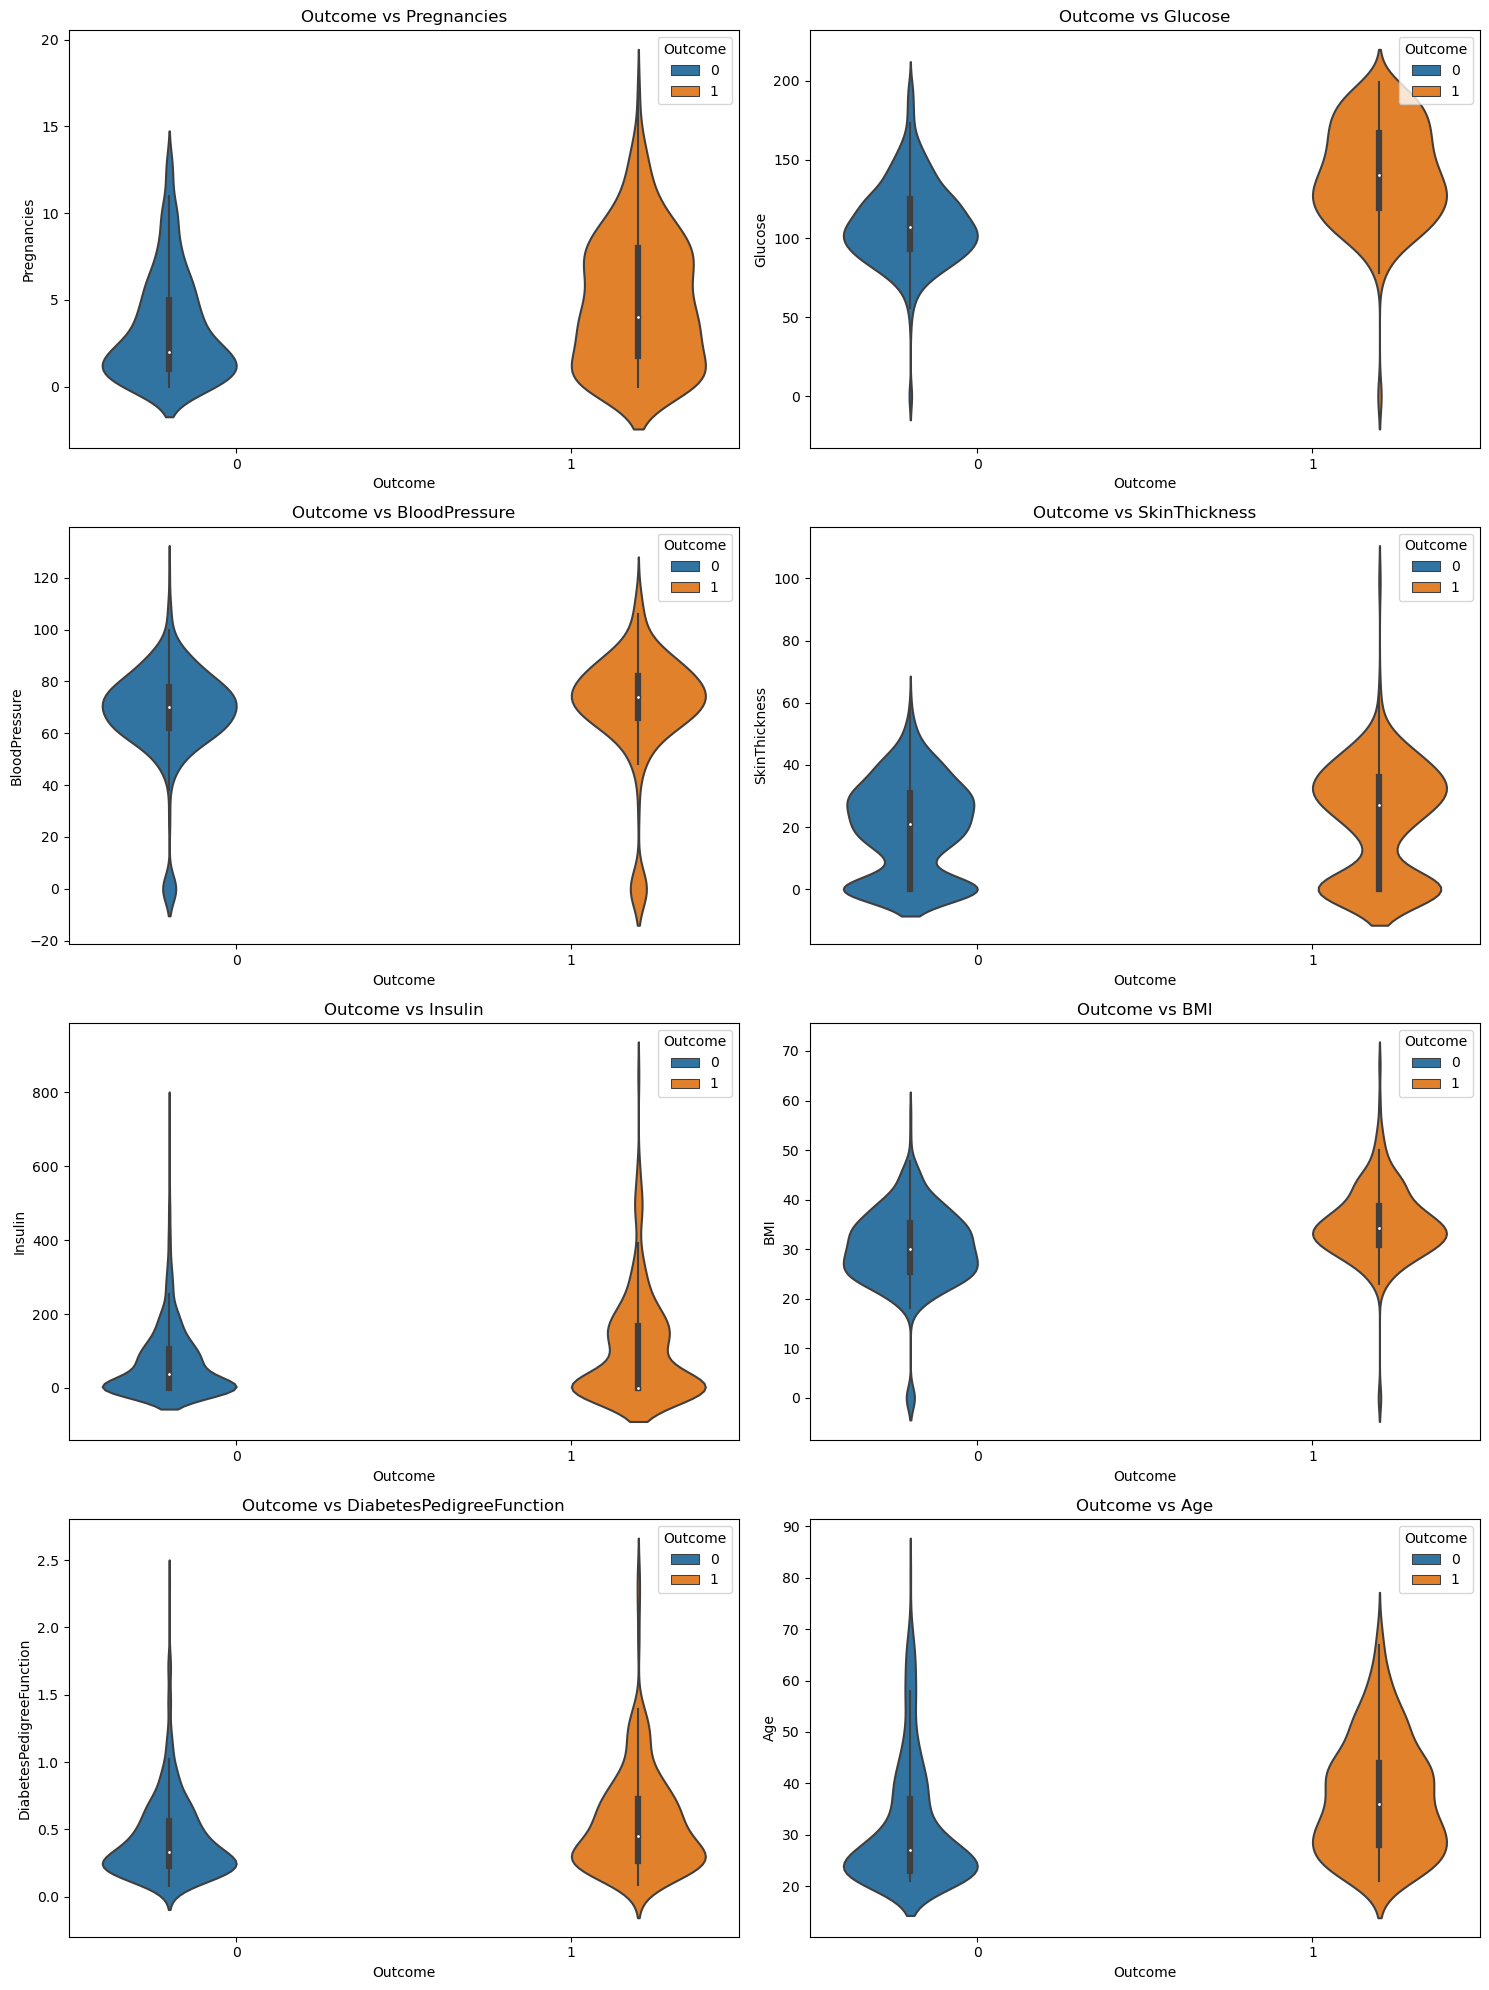

In [23]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.violinplot(data = df, x = 'Outcome', y = 'Pregnancies', hue= 'Outcome')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.violinplot(data = df, x = 'Outcome', y = 'Glucose', hue= 'Outcome')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.violinplot(data = df, x = 'Outcome', y = 'BloodPressure', hue= 'Outcome')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.violinplot(data = df, x = 'Outcome', y = 'SkinThickness', hue= 'Outcome')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.violinplot(data = df, x = 'Outcome', y = 'Insulin', hue= 'Outcome')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.violinplot(data = df, x = 'Outcome', y = 'BMI', hue= 'Outcome')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.violinplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction', hue= 'Outcome')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.violinplot(data = df, x = 'Outcome', y = 'Age', hue= 'Outcome')
plt.title('Outcome vs Age')

plt.tight_layout()

In [24]:
#The above plot shows the summary statistics of each variable when the outcome is 0 or 1,ie, for eg median value of pregnencies when the patient has tested +ve/-ve for diabetes or median age/ median insulin doses taken when the patient has diabetes and so on.

<AxesSubplot:>

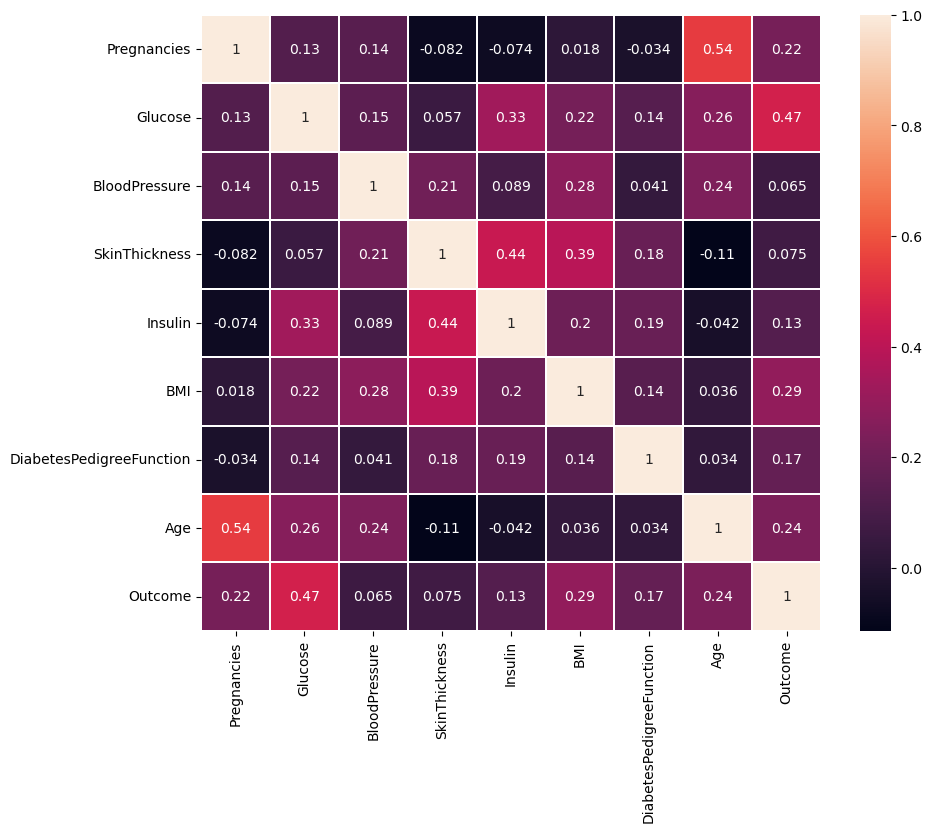

In [25]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot = True, linecolor = 'white',linewidths = 0.2)

In [26]:
#The above heatmap shows the color-coded correlation matrix between variable.

DATA SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:

scaler = StandardScaler()
scaler_feat = scaler.fit_transform(df.drop('Outcome',axis = 1))

In [29]:
df_feat = pd.DataFrame(scaler_feat, columns = df.columns[:-1])

In [30]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_feat

In [33]:
Y = df['Outcome']

In [34]:
X_train,X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

print('X Train:' , X_train.shape)
print('Y Train:' , Y_train.shape)
print('X Test:' , X_test.shape)
print('Y Test:' , Y_test.shape)

X Train: (537, 8)
Y Train: (537,)
X Test: (231, 8)
Y Test: (231,)


LOGISTIC REGRESSION MODEL

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [36]:
!pip install sklearn
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, Y_train)
lr_pred= lr.predict(X_test)

In [39]:
lr_pred, Y_test

(array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64),
 668    0
 324    0
 624    0
 690    0
 473    0
       ..
 619    1
 198    1
 538    0
 329    0
 302    0
 Name: Outcome, Length: 231, dtype: int64)

In [40]:
lr.score(X_test,Y_test)

0.7359307359307359

In [41]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [42]:
#The above table checks the performance of the model 

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

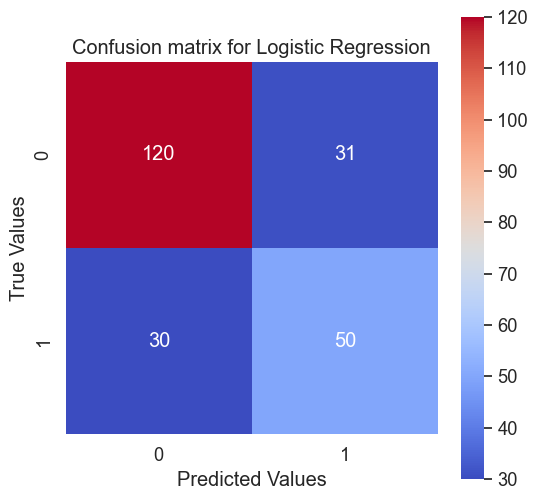

In [77]:
cm = confusion_matrix(Y_test,lr_pred)
plt.figure(figsize=(6,6))
sns.set(font_scale = 1.2)
sns.heatmap(cm,annot= True, fmt='d',cmap='coolwarm',square=True,xticklabels=['0','1'],yticklabels=['0','1'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion matrix for Logistic Regression')

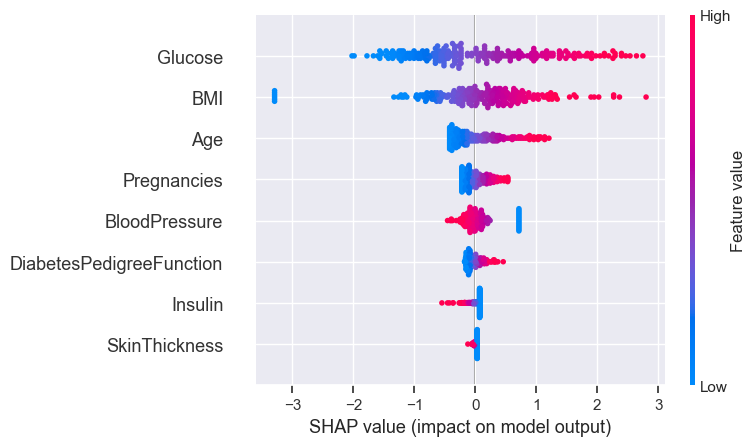

In [44]:
plt.figure(figsize=(12,8))
masker = shap.maskers.Independent(data = X_train)
explainer_of_dtc = shap.LinearExplainer(lr,masker=masker)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

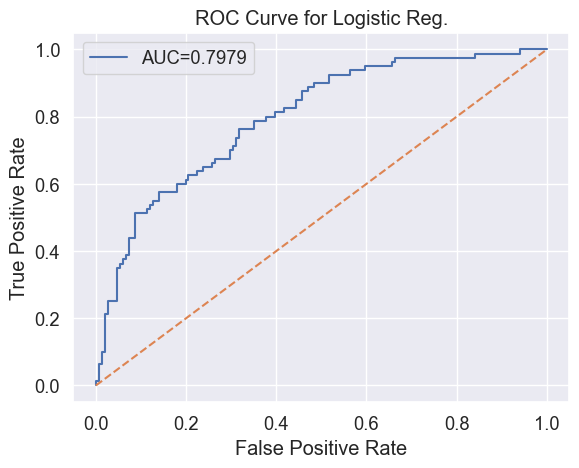

In [47]:
lr_pred_prob = lr.predict_proba(X_test)[:][:,1]

lr_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(lr_pred_prob,columns=['y pred prob'])],axis=1)
lr_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])
auc = roc_auc_score(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

In [48]:
#The above graph is used to evaluate the logistic regression model on a binary classification.

DECISION TREE MODEL

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc_pred = dtc.predict(X_test)

In [53]:
print(classification_report(Y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       151
           1       0.53      0.65      0.58        80

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

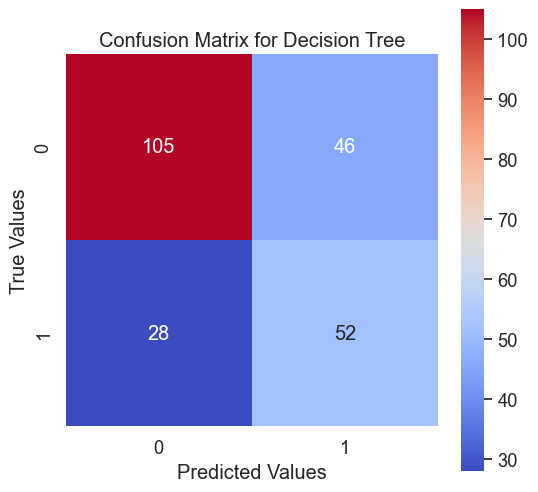

In [55]:
dtc_cm = confusion_matrix(Y_test,dtc_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') 
plt.ylabel('True Values') 
plt.title('Confusion Matrix for Decision Tree') 

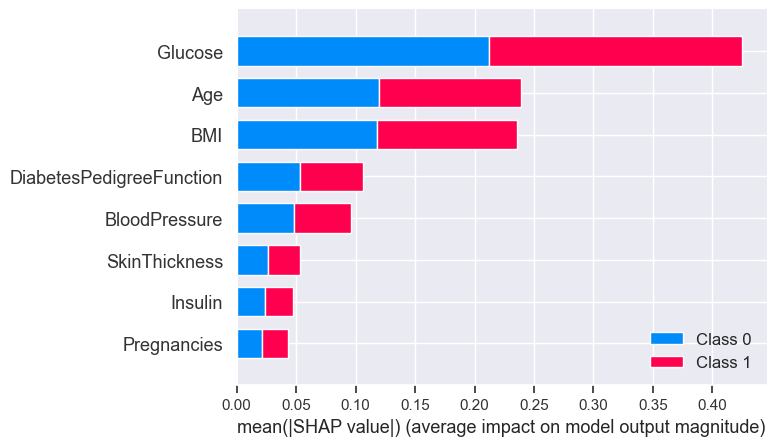

In [56]:
explainer_of_dtc = shap.TreeExplainer(dtc)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

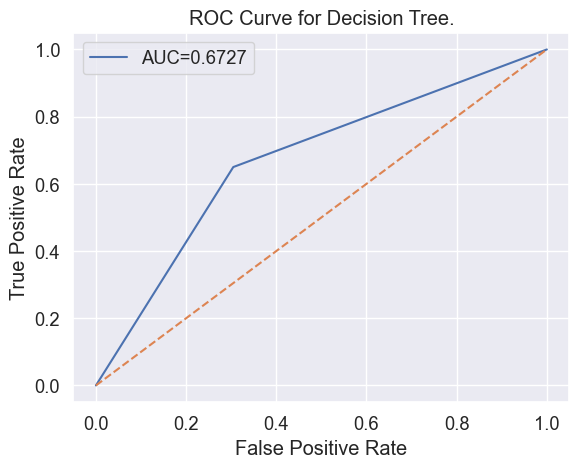

In [58]:
dtc_pred_prob = dtc.predict_proba(X_test)[:][:,1]

dtc_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(dtc_pred_prob,columns=['y pred prob'])],axis=1)
dtc_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(dtc_actual_predict['y actual'],dtc_actual_predict['y pred prob'])
auc = roc_auc_score(dtc_actual_predict['y actual'],dtc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree.')
plt.legend()

RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=200) 
rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)

In [63]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

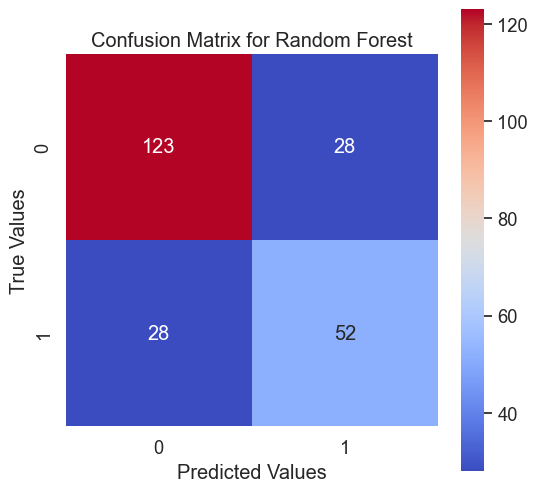

In [65]:
rfc_cm = confusion_matrix(Y_test,rfc_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') 
plt.ylabel('True Values') 
plt.title('Confusion Matrix for Random Forest')

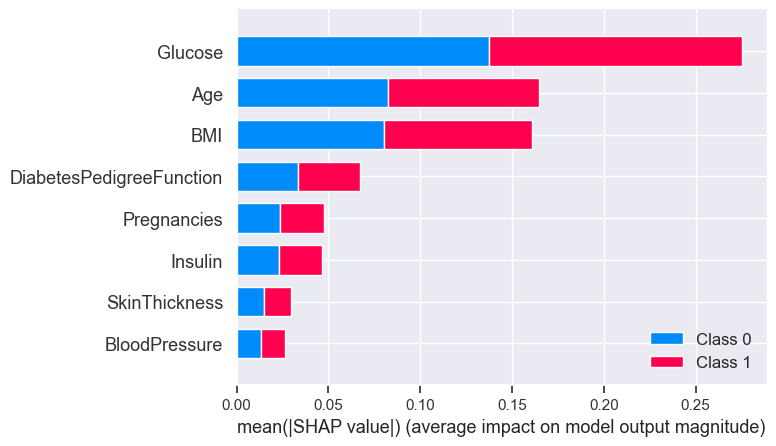

In [66]:
explainer_of_dtc = shap.TreeExplainer(rfc)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

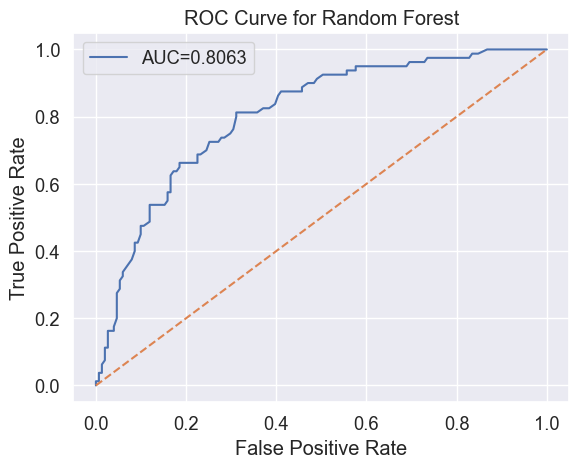

In [68]:
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])],axis=1)
rfc_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])
auc = roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()

SUPPORT VECTOR MACHINE (SVM)

In [69]:
from sklearn.svm import SVC

In [71]:
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
svm_pred = svm.predict(X_test)

In [73]:
print(classification_report(Y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Text(0.5, 1.0, 'Confusion Matrix for SVM')

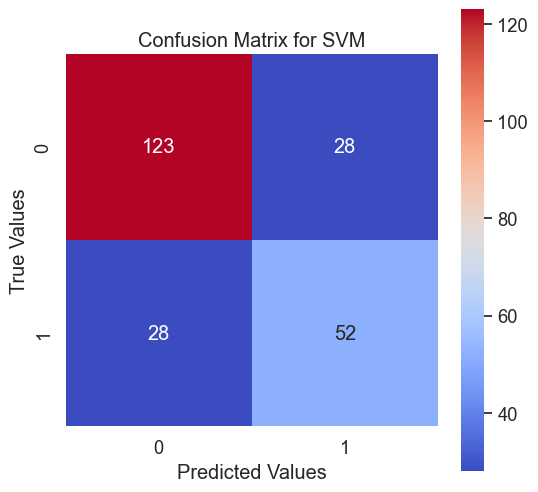

In [75]:
svm_cm = confusion_matrix(Y_test,rfc_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') 
plt.ylabel('True Values')
plt.title('Confusion Matrix for SVM')

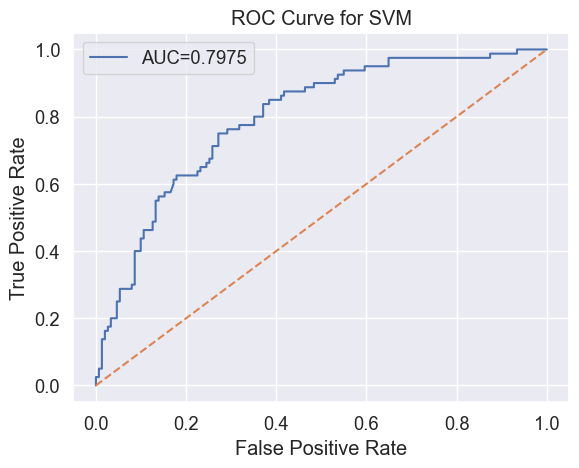

In [76]:
svm_pred_prob = svm.predict_proba(X_test)[:][:,1]

svm_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(svm_pred_prob,columns=['y pred prob'])],axis=1)
svm_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])
auc = roc_auc_score(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()

K NEAREST NEIGHBOR (KNN)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)

In [82]:
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



Text(0.5, 1.0, 'Confusion Matrix for KNN')

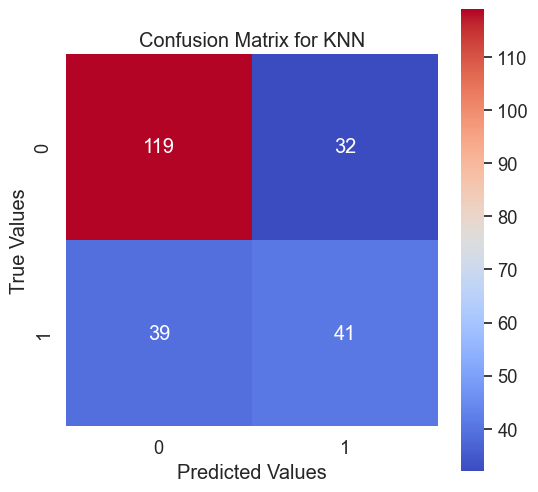

In [83]:
knn_cm = confusion_matrix(Y_test,knn_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') 
plt.ylabel('True Values')
plt.title('Confusion Matrix for KNN')

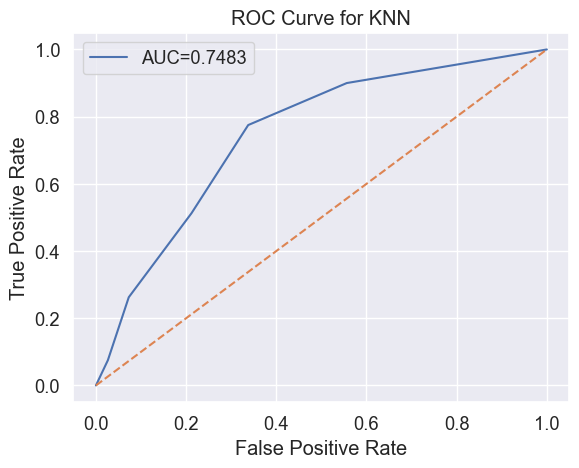

In [84]:
knn_pred_prob = knn.predict_proba(X_test)[:][:,1]

knn_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(knn_pred_prob,columns=['y pred prob'])],axis=1)
knn_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(knn_actual_predict['y actual'],knn_actual_predict['y pred prob'])
auc = roc_auc_score(knn_actual_predict['y actual'],knn_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()

ACCURACY SCORE COMPARISON BETWEEN ALL MODELS

In [85]:
print('Accuracy Score of Logistic Reg. : {:.2f}%'.format(accuracy_score(Y_test,lr_pred)*100))
print('Accuracy Score of Decision Tree : {:.2f}%'.format(accuracy_score(Y_test,dtc_pred)*100))
print('Accuracy Score of Random Forest : {:.2f}%'.format(accuracy_score(Y_test,rfc_pred)*100))
print('Accuracy Score of SVM           : {:.2f}%'.format(accuracy_score(Y_test,svm_pred)*100))
print('Accuracy Score of K N Neighbors : {:.2f}%'.format(accuracy_score(Y_test,knn_pred)*100))

Accuracy Score of Logistic Reg. : 73.59%
Accuracy Score of Decision Tree : 67.97%
Accuracy Score of Random Forest : 75.76%
Accuracy Score of SVM           : 74.89%
Accuracy Score of K N Neighbors : 69.26%


Hence, Random Foest Model gives us much better accuracy score (75.76%) as compare to other models. So, we can say that in future to predict that the patient have diabetes or not, we will use Random Forest Model to predict most accurate prediction.